In [1]:
### Run script

In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt


sys.path.append('/home/jacob/projects/quonium/python')
from config import colr
from config import config
from config import conOutput

col1, col2, col3 = '#EE2211', '#11CC22', '#1111EE'

conf = config()
conf['StateList'] = ['1S']
#conf['ChannelList'] = ['RGA','RGR','IDQ','IRQ','IDG','IRG']
conf['ChannelList'] = ['RGA','RGR']
conf['Nbb'], conf['NY'] = 49999, 1
conf['L'], conf['NXPart'] = 500, 40
conf['NThreads'] = 14
conf['dt'] = 4
conf['tFn'] = 25
#conf['doRecom'] = 0
hbarc = 0.1973
conf.echoParams()

L : 500
dt : 4
T : 0.3
tFn : 25
NY : 1
Nbb : 49999
pSampleType : 0
UniPMax : 3.0
pSampSig : 0.2
MatrElems : 0
qRGtype : 0
ECut : 40
prCut : 22
NPts : 200
ExportRates : True
NXPart : 40
NThreads : 14
HydroMode : 0
HPts : 20
doRecom : 1
doDisso : 1
RGRrateOpt : 1
Mb : 4.65
M1S : 9.091
M2S : 10.023
E1S : 0.20925
E2S : 0.723
bsig : 0.01
Ysig : 0.02
alphaS : 0.3
CF : 1.3333333333333333
NC : 3
gs : 0.75
Ch : 0
rateFile : bottom_rates_2d.tsv
boop : gleep
StateList : ['1S']
ChannelList : ['RGA', 'RGR']


In [2]:
from core import box
from mathFunc2 import doConfigCalc,calcClassExpec,calcRelExpec2
import mathFunc2 as mF

pPts = mF.getpPts(conf)
vPtsq = mF.vFp(pPts, conf['Mb'])
vPts1S = mF.vFp(pPts, conf['M1S'])

from mathFunc2 import fB, vFp, calcClassExpec, calcRelExpec2
def Ntot(dist, sep):
    return np.sum(dist)*sep
def runExp2(conf, pPts, DchInt, RchInt, st):
    bD, qD = fB(pPts, conf['M'+st], conf['T'])*conf['NY'], fB(pPts, conf['Mb'], conf['T'])*conf['Nbb']
    s = pPts[1]-pPts[0]
    res = [[0,Ntot(bD,s)/(Ntot(bD,s)+Ntot(qD,s))]]
    vPtsq = vFp(pPts, conf['Mb'])
    vPtsST = vFp(pPts, conf['M'+st])
    for i in range(conf['tFn']):
        if i == 0:
            continue
        Dtot = pPts*0
        Rtot = pPts*0
        for ch in DchInt:
            Dtot += ch(vPtsST)*bD*conf['dt']
        for ch in RchInt:
            Rtot += ch(vPtsq)*qD*Ntot(qD,s)*conf['dt']
        bD = bD-Dtot+(Ntot(Rtot,s)*fB(pPts, conf['M'+st], conf['T']))
        qD = qD-Rtot+(Ntot(Dtot,s)*fB(pPts, conf['Mb'], conf['T']))
        res.append([i*conf['dt'],Ntot(bD,s)/(Ntot(bD,s)+Ntot(qD,s))])
    return np.array(res)

In [3]:
doConfigCalc(conf)

Constants set
RGA_rate1S set
RGR_rateFv1S set


In [5]:
def runBox():
    b = box(conf)
    print('t:       Nhid:                    Dis:    Rec:      ')
    rnh = []
    print('BND:',len(b.boundC)*2)
    print('QRK:',len(b.quarkC))
    print('TOT',len(b.quarkC)+(len(b.boundC)*2))
    b.recLine()
    for i in range(conf['tFn']):
        b.step()
        b.recLine()
        dN = len(b.dissoEvents)
        rN = len(b.recomEvents)
        print(b.rec[-1][0],'    ',b.rec[-1][1], '    ',colr(str(dN),(200,50,50)),'    ', colr(str(rN),(100,100,200)))
        #print('t:',b.time,'')
        #Eb = b.getEb()
        ##EY = b.getEY()
        #EMix = b.getEMix()
        #Mb = b.getMbs()
        #MY = b.getMYs()
        #conOut.printLine([b.rec[-1][0], b.rec[-1][1], b.getNDEvs(), b.getNREvs(), b.cl.getStepTime(), b.cl.getExpectTime()])
    recA = np.array(b.rec) 
    print('BND:',len(b.boundC)*2)
    print('QRK:',len(b.quarkC))
    print('TOT',len(b.quarkC)+(len(b.boundC)*2))
    return recA

bR = []
for i in range(3):
    bR.append(runBox())
    
avg = np.mean(np.array(bR)[:,:,1],axis = 0)

t:       Nhid:                    Dis:    Rec:      
BND: 2
QRK: 99998
TOT 100000
4.0      0.00018      0      8
8.0      0.00032      2      9
12.0      0.0006      1      15
16.0      0.00072      5      11
20.0      0.00086      4      11
24.0      0.00104      6      15
28.0      0.00112      13      17
32.0      0.00112      8      8
36.0      0.00114      12      13
40.0      0.00112      11      10
44.0      0.00138      6      19
48.0      0.0015      7      13
52.0      0.0017      6      16
56.0      0.00172      10      11
60.0      0.0017      14      13
64.0      0.00158      17      11
68.0      0.00166      9      13
72.0      0.00168      9      10
76.0      0.00176      8      12
80.0      0.00172      13      11
84.0      0.00166      14      11
88.0      0.00174      7      11
92.0      0.00166      14      10
96.0      0.00164      11      10
100.0      0.00174      11      16
BND: 174
QRK: 99826
TOT 100000
t:       Nhid:                    Dis:    Rec:      
BND: 2

In [6]:
avg = np.mean(np.array(bR)[:,:,1],axis = 0)
print(avg)

[2.00000000e-05 1.93333333e-04 3.93333333e-04 6.46666667e-04
 8.13333333e-04 9.60000000e-04 1.11333333e-03 1.16666667e-03
 1.18000000e-03 1.18666667e-03 1.23333333e-03 1.35333333e-03
 1.46000000e-03 1.56000000e-03 1.58666667e-03 1.52000000e-03
 1.47333333e-03 1.53333333e-03 1.62666667e-03 1.67333333e-03
 1.63333333e-03 1.63333333e-03 1.64666667e-03 1.60000000e-03
 1.70000000e-03 1.82000000e-03]


nonrel-Nhid/Ntot: 0.001730484230463492
rel-Nhid/Ntot: 0.0014666271038068232


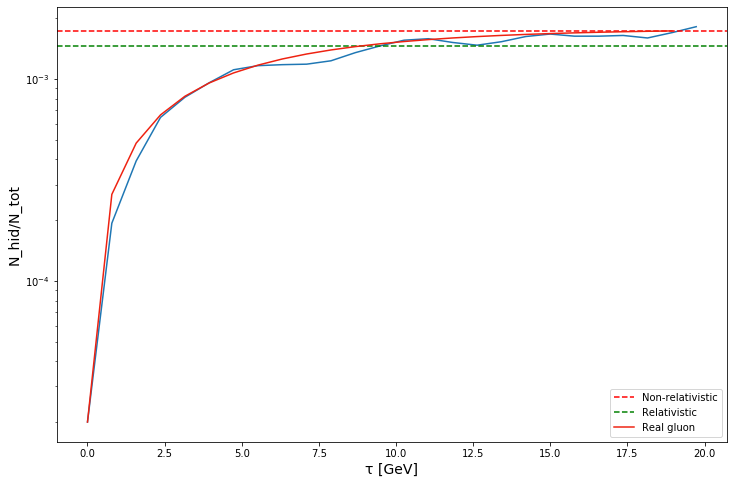

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(bR[0][:,0]*hbarc,avg)
plt.axhline(y=calcClassExpec(conf), color='r', linestyle='--', label='Non-relativistic')
plt.axhline(y=calcRelExpec2(conf), color='g', linestyle='--', label='Relativistic')

RGexp = runExp2(conf, pPts, [conf['RGA_rate1S']], [conf['RGR_rateFv1S']], '1S')
#IQexp = runExp2(conf, pPts, [conf['IDQ_rate1S']], [conf['IRQ_rateFv1S']], '1S')
#IGexp = runExp2(conf, pPts, [conf['IDG_rate1S']], [conf['IRG_rateFv1S']], '1S')
#totexp = runExp2(conf, pPts, [conf['RGA_rate1S'],conf['IDQ_rate1S'],conf['IDG_rate1S']], [conf['RGR_rateFv1S'],conf['IRQ_rateFv1S'],conf['IRG_rateFv1S']], '1S')


#tPts = gettauPts(conf)
plt.plot(RGexp[:,0]*hbarc, RGexp[:,1], color=col1, label='Real gluon')
#plt.plot(IQexp[:,0], IQexp[:,1], color=col2, label='Inelastic scatting w/ light quarks')
#plt.plot(IGexp[:,0], IGexp[:,1], color=col3, label='Inelastic scatting w/ gluons')
#plt.plot(totexp[:,0], totexp[:,1], color='k', label='Combined')
#plt.axhline(y=calcClassExpec(conf), color='r', linestyle='--', label='Non-relativistic')
#plt.axhline(y=calcRelExpec2(conf), color='g', linestyle='--', label='Relativistic')

plt.xlabel('τ [GeV]',fontsize=14)
plt.ylabel('N_hid/N_tot',fontsize=14)
plt.yscale('log')
plt.legend()
plt.show()

Constants set
RGA_rate1S set
RGR_rateFv1S set
IDQ_rate1S set
IRQ_vInt1S set
IRQ_rateFv1S set
IDG_rate1S set
IRG_vInt1S set
IRG_rateFv1S set
t:       Nhid:                    Dis:    Rec:      
BND: 2
QRK: 99998
TOT 100000
4.0      0.00032      0      15
8.0      0.00052      3      13
12.0      0.00066      7      14
16.0      0.00064      17      16
20.0      0.00088      11      23
24.0      0.0009      10      11
28.0      0.00092      12      13
32.0      0.0009      19      18
36.0      0.00096      13      16
40.0      0.0009      15      12
44.0      0.00098      11      15
48.0      0.00094      18      16
52.0      0.0009      15      13
56.0      0.00086      15      13
60.0      0.00108      6      17
64.0      0.00102      18      15
68.0      0.0008      21      10
72.0      0.00096      10      18
76.0      0.0011      10      17
80.0      0.00114      13      15
84.0      0.00114      18      18
88.0      0.0011      16      14
92.0      0.00106      14      12
96.0     

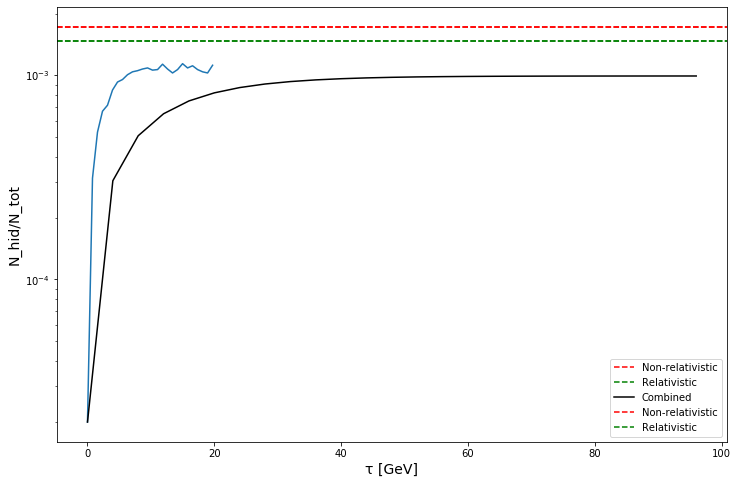

In [9]:
conf['ChannelList'] = ['RGA','RGR','IDQ','IRQ','IDG','IRG']

doConfigCalc(conf)

aR = []
for i in range(3):
    aR.append(runBox())
    
avgA = np.mean(np.array(aR)[:,:,1],axis = 0)



nonrel-Nhid/Ntot: 0.001730484230463492
rel-Nhid/Ntot: 0.0014666271038068232


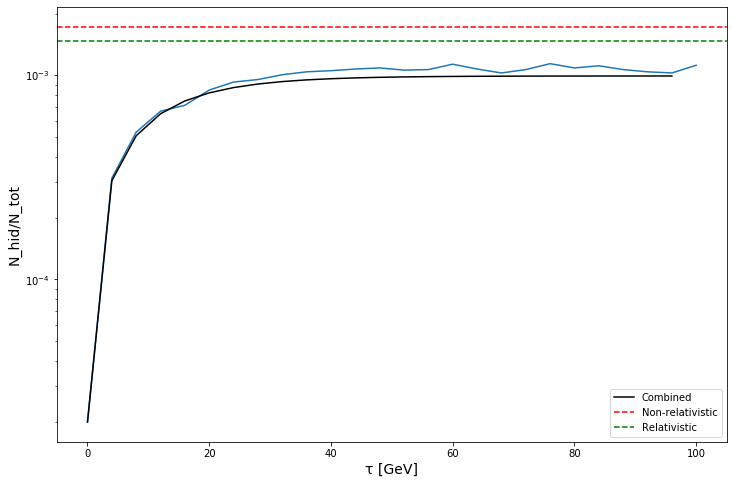

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(bR[0][:,0],avgA)
#plt.axhline(y=calcClassExpec(conf), color='r', linestyle='--', label='Non-relativistic')
#plt.axhline(y=calcRelExpec2(conf), color='g', linestyle='--', label='Relativistic')

#RGexp = runExp2(conf, pPts, [conf['RGA_rate1S']], [conf['RGR_rateFv1S']], '1S')
#IQexp = runExp2(conf, pPts, [conf['IDQ_rate1S']], [conf['IRQ_rateFv1S']], '1S')
#IGexp = runExp2(conf, pPts, [conf['IDG_rate1S']], [conf['IRG_rateFv1S']], '1S')
totexp = runExp2(conf, pPts, [conf['RGA_rate1S'],conf['IDQ_rate1S'],conf['IDG_rate1S']], [conf['RGR_rateFv1S'],conf['IRQ_rateFv1S'],conf['IRG_rateFv1S']], '1S')


#tPts = gettauPts(conf)
#plt.plot(RGexp[:,0]*hbarc, RGexp[:,1], color=col1, label='Real gluon')
#plt.plot(IQexp[:,0], IQexp[:,1], color=col2, label='Inelastic scatting w/ light quarks')
#plt.plot(IGexp[:,0], IGexp[:,1], color=col3, label='Inelastic scatting w/ gluons')
plt.plot(totexp[:,0], totexp[:,1], color='k', label='Combined')
plt.axhline(y=calcClassExpec(conf), color='r', linestyle='--', label='Non-relativistic')
plt.axhline(y=calcRelExpec2(conf), color='g', linestyle='--', label='Relativistic')

plt.xlabel('τ [GeV]',fontsize=14)
plt.ylabel('N_hid/N_tot',fontsize=14)
plt.yscale('log')
plt.legend()
plt.show()